In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin
from sklearn.metrics import mean_squared_error as MSE

### Стационарная теплопроводность в неоднородном стержне

$$
-\frac{d}{dx} (k \frac{du}{dx}) = f(x),    0<x<1 \\
u(0) = g_0, u(1) = g_1
$$

In [2]:
def solver(N):    
    M = 2*N+1            # количество узлов 
    h = 1/N              # шаг
    
    x = np.linspace(0, 1, M)
    A_k = 1/(3*h) * np.array([[7, -8, 1], [-8, 16, -8], [1, -8, 7]])
    F_k = h/30 * np.array([[4, 2, -1], [2, 16, 2], [-1, 2, 4]])
    
    A = np.zeros((M, M))
    F = np.zeros(M)
    
    for i in range(0, M-1, 2):
        A[i:i+3, i:i+3] += k(x[i+1])*A_k
        F[i:i+3] += F_k.dot(np.array([f(x[i]), f(x[i+1]), f(x[i+2])]))
        
    
    A[0, 0] = 1
    A[0, 1:] = 0
    F[0] = g0
    
    A[-1, -1] = 1
    A[-1, :-1] = 0
    F[-1] = g1
    
    return np.linalg.solve(A, F)

In [3]:
def f(x):
    return 1 + pi/2 * sin(pi*x)


def k(x):
    return 1


g0 = 0
g1 = 1


def preciseSolution(x):
    """
    
    Precise solution for parameters:
    
    f(x) = 1 + pi/2 * sin(pi*x)
    k(x) = 1
    
    """
    
    return -g0*(x-1)+x/2*(2*g1-x+1)+sin(pi*x)/(2*pi)

8 элементов, MSE = 1.1746223406639515e-11
16 элементов, MSE = 4.769790819737754e-14
32 элементов, MSE = 1.8960983243122944e-16
64 элементов, MSE = 7.46611191181607e-19


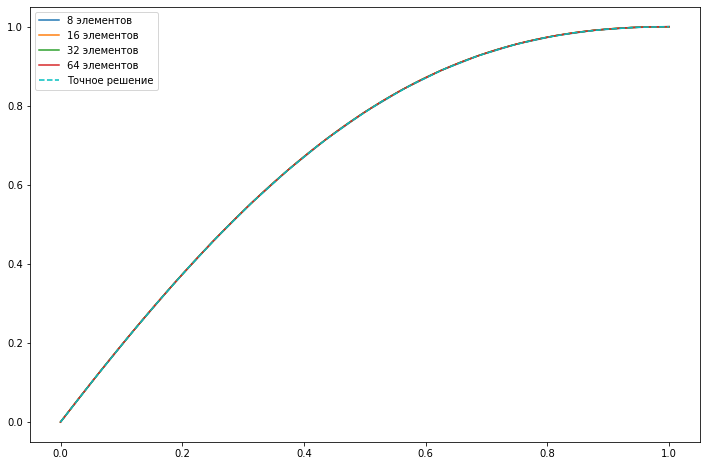

In [4]:
errors = []

fig, ax = plt.subplots(figsize = (12, 8))
all_N = [8, 16, 32, 64]
for N in all_N:
    x = np.linspace(0,1,2*N+1)
    u = solver(N)
    y = [preciseSolution(i) for i in x]
    
    err = MSE(y,u)
    print(str(N) + ' элементов, MSE =', err)
    errors.append(err)
    
    ax.plot(x, u, label = str(N) + ' элементов')
    
x = np.linspace(0,1,20)
y = [preciseSolution(i) for i in x]
ax.plot(x,y, 'c--', label = 'Точное решение')

plt.legend()

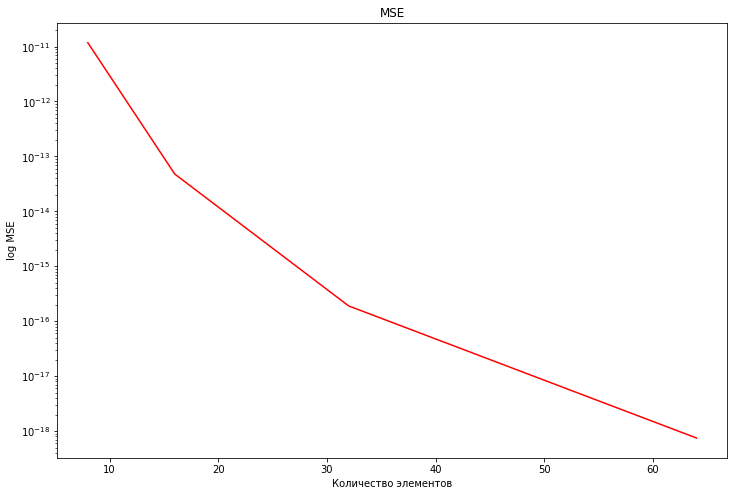

In [5]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.title('MSE')
plt.xlabel('Количество элементов')
plt.ylabel('log MSE')
ax.plot(all_N, errors, 'r-')
ax.set_yscale('log')